In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)

In [196]:
# from scipy.io import arff
# data, meta = arff.loadarff('../week-1/mnist_784.arff')
# df = pd.DataFrame(data)
# df.to_csv('../week-1/mnist_784.csv', index=False)

In [197]:
df = pd.read_csv('../week-1/mnist_784.csv')
df['class'] = df['class'].apply(lambda x: int(x[2:-1]))
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [198]:
df_train = df.iloc[:60000]
df_test = df.iloc[60000:]

df_train.shape
df_test.shape

(60000, 785)

(10000, 785)

In [199]:
df_train_two = df_train[df_train['class'] == 2]
df_test_two = df_test[df_test['class'] == 2]

df_train_two.shape
df_test_two.shape

(5958, 785)

(1032, 785)

In [200]:
X_train = df_train_two.iloc[:100, :-1].values.T
X_test = df_test_two.iloc[:1, :-1].values.T

X_train.shape
X_test.shape

(784, 100)

(784, 1)

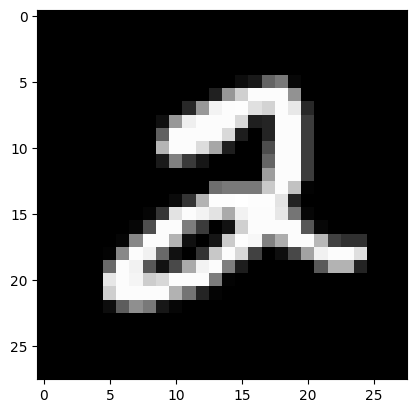

In [201]:
_ = plt.imshow(X_train[:, 0].reshape(28, 28), cmap='gray')

In [202]:
X_train_mean = X_train.mean(axis=1, keepdims=True)
X_train = X_train - X_train_mean
X_test = X_test - X_train_mean
np.allclose(X_train.mean(axis=1, keepdims=True), 0)

True

In [203]:
n = X_train.shape[1]
C = X_train @  X_train.T / n
C.shape

(784, 784)

In [204]:
eigenvalues, eigenvectors = np.linalg.eigh(C)
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

eigenvalues.shape
eigenvectors.shape

(784,)

(784, 784)

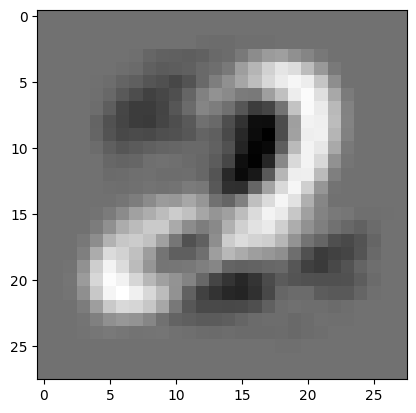

In [205]:
_ = plt.imshow(eigenvectors[:, 0].reshape(28, 28), cmap='gray')

In [206]:
def find_k(threshold):
  return np.argmax(np.cumsum(eigenvalues) / sum(eigenvalues) >= threshold) + 1


for threshold in [.2, .5, .8, .95, 1]:
  print(f"{threshold*100}%, k={find_k(threshold)}")

20.0%, k=2
50.0%, k=6
80.0%, k=22
95.0%, k=53
100%, k=99


In [207]:
k = find_k(threshold=0.95)
W = eigenvectors[:, :k]
W.shape

(784, 53)

In [208]:
coefficients = X_test.T @ W
coefficients.shape

(1, 53)

In [209]:
X_test_ = (coefficients @ W.T).T
X_test_.shape
X_test.shape
np.sqrt(np.mean((X_test - X_test_)**2))  # rmse

(784, 1)

(784, 1)

np.float64(34.647313373837505)

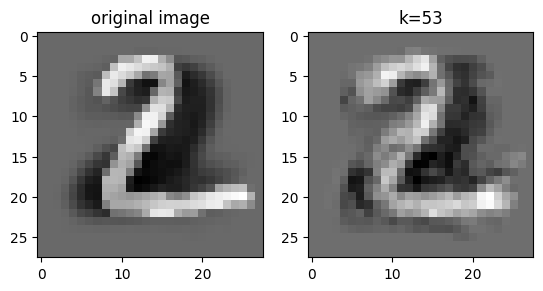

In [210]:
_ = plt.subplot(1, 2, 1)
_ = plt.title('original image')
_ = plt.imshow(X_test.reshape(28, 28), cmap='gray')

_ = plt.subplot(1, 2, 2)
_ = plt.title(f"k={k}")
_ = plt.imshow(X_test_.reshape(28, 28), cmap='gray')

rmse: 65.01864406659871


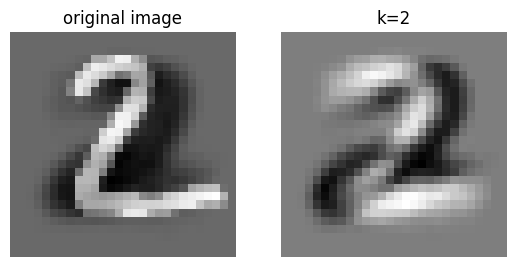

rmse: 61.31819056095393


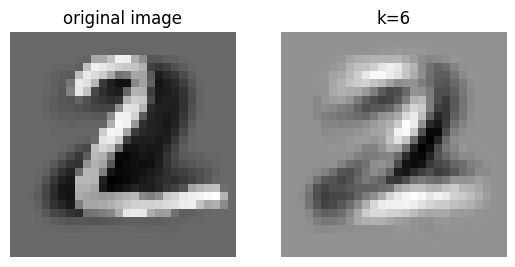

rmse: 46.026883720369455


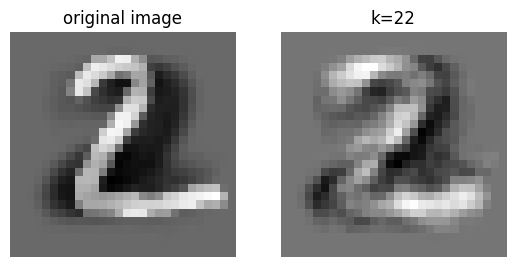

rmse: 34.647313373837505


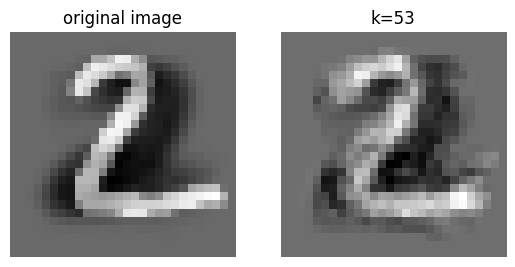

rmse: 30.641900462995615


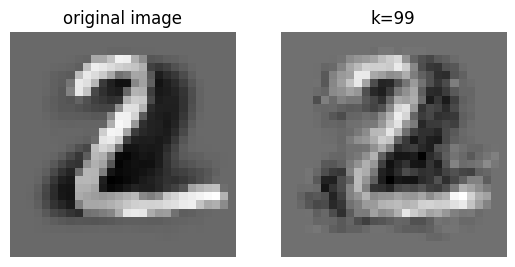

rmse: 1.4122110477847142e-13


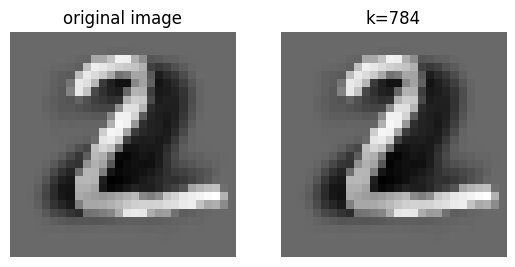

In [214]:
def plot_pca(k):
  W = eigenvectors[:, :k]
  coefficients = X_test.T @ W
  X_test_ = (coefficients @ W.T).T
  print(f"rmse: {np.sqrt(np.mean((X_test - X_test_)**2))}")

  _ = plt.subplot(1, 2, 1)
  _ = plt.title('original image')
  _ = plt.imshow(X_test.reshape(28, 28), cmap='gray')
  plt.axis("off")

  _ = plt.subplot(1, 2, 2)
  _ = plt.title(f"k={k}")
  _ = plt.imshow(X_test_.reshape(28, 28), cmap='gray')
  plt.axis("off")
  plt.show()


plot_pca(k=find_k(threshold=.2))
plot_pca(k=find_k(threshold=.5))
plot_pca(k=find_k(threshold=.8))
plot_pca(k=find_k(threshold=.95))
plot_pca(k=find_k(threshold=1))
plot_pca(k=784)

k=2, rmse: 65.01864406659871
k=6, rmse: 61.31819056095393
k=22, rmse: 46.026883720369455
k=53, rmse: 34.647313373837505
k=99, rmse: 30.641900462995615
k=784, rmse: 1.4122110477847142e-13


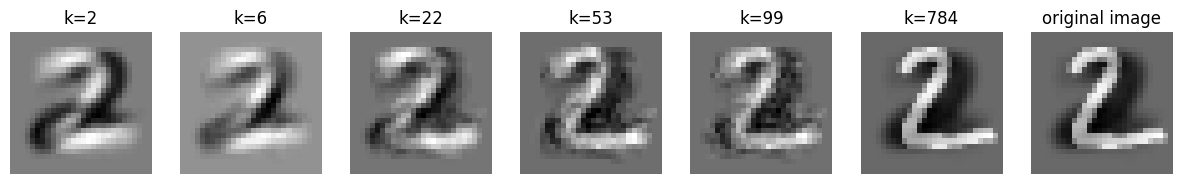

In [212]:
def plot_pca(k_values):
  plt.figure(figsize=(15, 3))
  cols = len(k_values) + 1

  for idx, k in enumerate(k_values, start=1):
    W = eigenvectors[:, :k]
    coefficients = X_test.T @ W
    X_test_ = (coefficients @ W.T).T
    print(f"k={k}, rmse: {np.sqrt(np.mean((X_test - X_test_)**2))}")

    _ = plt.subplot(1, cols, idx)
    _ = plt.title(f"k={k}")
    _ = plt.imshow(X_test_.reshape(28, 28), cmap='gray')
    plt.axis('off')

  _ = plt.subplot(1, cols, idx+1)
  _ = plt.title('original image')
  _ = plt.imshow(X_test.reshape(28, 28), cmap='gray')
  plt.axis('off')


k_values = [find_k(threshold=t) for t in [.2, .5, .8, .95, 1]]
k_values.append(784)
plot_pca(k_values)